# Data Science Regression Project: Predicting Flat Prices in Singapore
Dataset is downloaded from here: https://www.kaggle.com/teyang/singapore-hdb-flat-resale-prices-19902020

In this project, I will predict the resale prices of Singapore hdb flats using a regression model.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

### Data Load: Load home prices into a dataframe

In [2]:
df1 = pd.read_csv("flat-prices-2017.csv")
df1.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


# 1. Discover and visualise the data

## 1.1 Understand, Clean and Format Data

In [3]:
df1.shape

(80374, 11)

In [4]:
df1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [5]:
df1['storey_range'].unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

In [6]:
df1['flat_model'].value_counts()

Model A                   26288
Improved                  20067
New Generation            11061
Premium Apartment          8689
Simplified                 3368
Apartment                  3257
Maisonette                 2376
Standard                   2260
DBSS                       1332
Model A2                   1045
Adjoined flat               152
Model A-Maisonette          136
Type S1                     134
Type S2                      74
Terrace                      46
Multi Generation             37
Premium Apartment Loft       26
Improved-Maisonette          14
Premium Maisonette           10
2-room                        2
Name: flat_model, dtype: int64

In [7]:
df1['flat_type'].value_counts()

4 ROOM              33282
5 ROOM              19947
3 ROOM              19420
EXECUTIVE            6411
2 ROOM               1240
1 ROOM                 37
MULTI-GENERATION       37
Name: flat_type, dtype: int64

In [8]:
df1['town'].value_counts()

SENGKANG           6408
WOODLANDS          6019
JURONG WEST        5984
YISHUN             5641
TAMPINES           5235
PUNGGOL            5119
BEDOK              4356
HOUGANG            3848
ANG MO KIO         3613
CHOA CHU KANG      3333
BUKIT PANJANG      3197
BUKIT MERAH        3097
BUKIT BATOK        2953
TOA PAYOH          2646
PASIR RIS          2421
KALLANG/WHAMPOA    2275
QUEENSTOWN         2140
SEMBAWANG          2104
GEYLANG            1928
JURONG EAST        1793
CLEMENTI           1785
SERANGOON          1601
BISHAN             1535
CENTRAL AREA        658
MARINE PARADE       465
BUKIT TIMAH         220
Name: town, dtype: int64

#### Drop features that are not required to build my model

In [9]:
df2 = df1.drop(['month','block','street_name','flat_model','lease_commence_date'],axis='columns')
df2.shape

(80374, 6)

#### Data Cleaning: Handle NA values

In [10]:
df2.isnull().sum()

town               0
flat_type          0
storey_range       0
floor_area_sqm     0
remaining_lease    0
resale_price       0
dtype: int64

## 1.2 Feature Engineering

#### I will take only the years remaining from the remaining_lease column to have a numerical value

In [11]:
df2['remaining_lease'] = df2['remaining_lease'].apply(lambda x: int(x[:2]))

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80374 entries, 0 to 80373
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   town             80374 non-null  object 
 1   flat_type        80374 non-null  object 
 2   storey_range     80374 non-null  object 
 3   floor_area_sqm   80374 non-null  float64
 4   remaining_lease  80374 non-null  int64  
 5   resale_price     80374 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [13]:
df2.head(5)

,town,flat_type,storey_range,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,61,232000.0
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,60,250000.0
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,62,262000.0
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,62,265000.0
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,62,265000.0


In [14]:
df2

,town,flat_type,storey_range,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,61,232000.0
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,60,250000.0
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,62,262000.0
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,62,265000.0
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,62,265000.0
...,...,...,...,...,...,...
80369,YISHUN,5 ROOM,07 TO 09,131.0,66,440000.0
80370,YISHUN,5 ROOM,07 TO 09,122.0,65,458000.0
80371,YISHUN,5 ROOM,04 TO 06,122.0,66,490000.0
80372,YISHUN,EXECUTIVE,04 TO 06,146.0,66,558000.0


#### As for flat_type, I will take the the number of rooms for each flat type and as "MULTI-GENERATION" have only 37 values, I will merge it with "EXECUTIVE" to be the number 5.

In [15]:
df3 = df2.copy()
room_5 = ["MULTI-GENERATION", "EXECUTIVE"]

In [16]:
df3['flat_type'] = df3['flat_type'].apply(lambda x: "5 ROOM" if x in room_5 else x)

In [17]:
df3['flat_type'] = df3['flat_type'].apply(lambda x: int(x.split(' ')[0]))

In [18]:
df3['flat_type'].value_counts()

4    33282
5    26395
3    19420
2     1240
1       37
Name: flat_type, dtype: int64

#### Next, I will change the storey_range from a string to the average number between the lower and upper range. (E.g 01 to 03: 2)

In [19]:
df4 = df3.copy()
df4['storey_range'] = df4['storey_range'].apply(lambda x:
                      ((int(x.split(' TO ')[0]) + int(x.split(' TO ')[1])) / 2))

In [20]:
df4.head(5)

,town,flat_type,storey_range,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2,11.0,44.0,61,232000.0
1,ANG MO KIO,3,2.0,67.0,60,250000.0
2,ANG MO KIO,3,2.0,67.0,62,262000.0
3,ANG MO KIO,3,5.0,68.0,62,265000.0
4,ANG MO KIO,3,2.0,67.0,62,265000.0


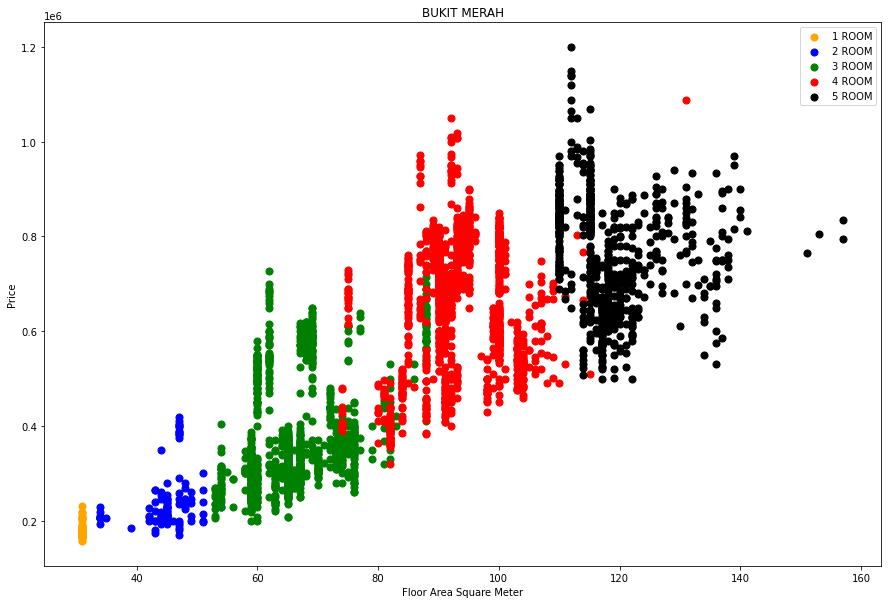

In [21]:
def plot_scatter_chart(df,town):
    room1 = df[(df.town==town) & (df.flat_type==1)]
    room2 = df[(df.town==town) & (df.flat_type==2)]
    room3 = df[(df.town==town) & (df.flat_type==3)]
    room4 = df[(df.town==town) & (df.flat_type==4)]
    room5 = df[(df.town==town) & (df.flat_type==5)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(room1.floor_area_sqm,room1.resale_price,color='orange',label='1 ROOM', s=50)
    plt.scatter(room2.floor_area_sqm,room2.resale_price,color='blue',label='2 ROOM', s=50)
    plt.scatter(room3.floor_area_sqm,room3.resale_price, color='green',label='3 ROOM', s=50)
    plt.scatter(room4.floor_area_sqm,room4.resale_price,color='red',label='4 ROOM', s=50)
    plt.scatter(room5.floor_area_sqm,room5.resale_price,color='black',label='5 ROOM', s=50)
    plt.xlabel("Floor Area Square Meter")
    plt.ylabel("Price")
    plt.title(town)
    plt.legend()
    
plot_scatter_chart(df4,"BUKIT MERAH")

I will then proceed to one-hot encode the locations

In [22]:
dummies = pd.get_dummies(df4.town)
dummies.head(3)

,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df5 = pd.concat([df4,dummies],axis='columns')
df5.head(3)

,town,flat_type,storey_range,floor_area_sqm,remaining_lease,resale_price,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,ANG MO KIO,2,11.0,44.0,61,232000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ANG MO KIO,3,2.0,67.0,60,250000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ANG MO KIO,3,2.0,67.0,62,262000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df6 = df5.drop('town', axis = 'columns')
df6.head(3)

,flat_type,storey_range,floor_area_sqm,remaining_lease,resale_price,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,2,11.0,44.0,61,232000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2.0,67.0,60,250000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2.0,67.0,62,262000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Prepare the data for Machine Learning Algorithms

In [25]:
X = df6.drop(['resale_price'],axis='columns')
X.shape

(80374, 30)

In [26]:
y = df6.resale_price
y.shape

(80374,)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# 3. Select and Train Models

## 3.1 Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8377265281701546

## 3.2 Lasso

In [29]:
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(X_train,y_train)
la.score(X_test,y_test)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7342023280012.406, tolerance: 150764973173.56302
  model = cd_fast.enet_coordinate_descent(


0.8377256792621233

## 3.3 Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)

0.9144987371115958

## Use K Fold cross validation to measure accuracy of the 3 models

In [31]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

lr_cv = cross_val_score(LinearRegression(), X, y, cv=cv)
print(lr_cv)

la_cv = cross_val_score(Lasso(), X, y, cv=cv)
print(la_cv)

dtr_cv = cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)
print(dtr_cv)

[0.84452046 0.84260916 0.83820258 0.83850745 0.83867761]


D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7498437400873.3125, tolerance: 150164225186.115
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7463095241158.3125, tolerance: 150613998971.30145
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7355510134404.844, tolerance: 151543543478.73685
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want

[0.84451869 0.84260419 0.8382015  0.83850693 0.83867966]
[0.92005838 0.92100356 0.91910071 0.91806687 0.91707343]


#### We can see that in 5 iterations we get a score above 80% all the time.

# 4. Fine-tune & Evaluate the models
I will use GridSearchCV to get the best parameters for each models and run the algorithm again with the new model and see if the accuracy changes for the models.

In [32]:
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73411258435373.69, tolerance: 150164225186.115
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95474384270776.44, tolerance: 150613998971.30145
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12509251232094.188, tolerance: 151543543478.73685
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want 

,model,best_score,best_params
0,linear_regression,0.840503,{'normalize': False}
1,lasso,0.840502,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.919346,"{'criterion': 'mse', 'splitter': 'best'}"


Based on above results we can say that DecisionTreeRegressor gives the best score. Hence we will use that.

# 5. Deployment

## 5.1 Export the tested model to a pickle file

In [35]:
import pickle
with open('hdb_resale_price.pickle','wb') as f:
    pickle.dump(dtr,f)

## 5.2 Export location and column information to a file that will be useful later on in the prediction application


In [34]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))